In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor


In [4]:

df_train = pd.read_csv("/kaggle/input/training/train_set.csv")
df_test = pd.read_csv("/kaggle/input/training/test_set.csv")
df_val = pd.read_csv("/kaggle/input/training/val_set.csv")

In [5]:
df_train.index = pd.to_datetime(df_train['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_test.index = pd.to_datetime(df_test['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_val.index = pd.to_datetime(df_val['date_time_IST'],format = '%d-%m-%Y %H:%M')


In [6]:
'''removing only the date_time_IST column and keeping everything else'''
df_train = df_train.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_test = df_test.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_val = df_val.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
# df_train = df_train.drop(columns=['date_time_IST'])
# df_test = df_test.drop(columns=['date_time_IST'])
# df_val = df_val.drop(columns=['date_time_IST'])

In [7]:
# Define the target variable and features
target = '3hr_vsby_km'
X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_val = df_val.drop(columns=[target])
y_val = df_val[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]


In [12]:
xgb = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [3, 6, 9],                 
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.7, 0.8, 0.9]            
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=-0.637 total time=   1.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=-0.494 total time=   1.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-0.639 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9;, score=-0.638 total time=   1.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7;, score=-0.449 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8;, score=-0.464 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9;, score=-0.488 total time=   2.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.446 total time=   3.7s
[CV 5/5] END learning_rate=0.01, max_depth

Validation MSE: 0.2187551856960977
Validation R^2: 0.7240133091306743
Validation RMSE: 0.46771271705620504
Test MSE: 0.23349085117968812
Test R^2: 0.7576642269744808
Test RMSE: 0.48320891049285103


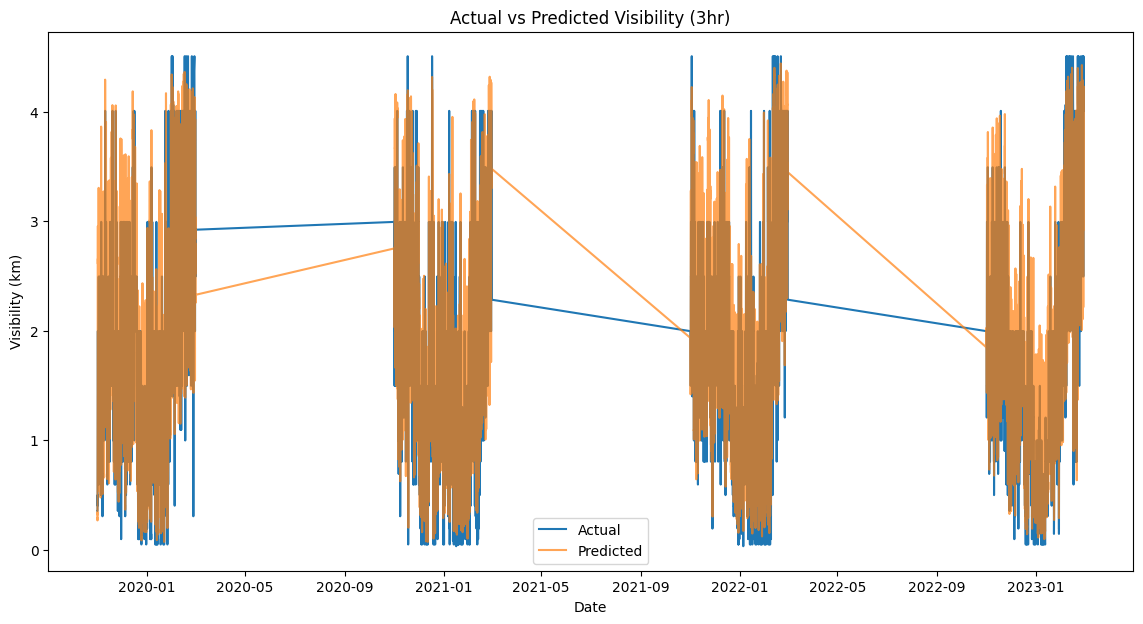

[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.359 total time=   2.6s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.400 total time=   2.6s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.257 total time=   2.5s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9;, score=-0.342 total time=   2.8s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.7;, score=-0.347 total time=   1.5s
[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-0.354 total time=   1.5s
[CV 1/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.9;, score=-0.402 total time=   1.6s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.9;, score=-0.269 total time=   1.5s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.7;, score=-0.356 total time=   2.8s
[

In [13]:

val_predictions = best_xgb.predict(X_val)

val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f'Validation MSE: {val_mse}')
print(f'Validation R^2: {val_r2}')
print(f'Validation RMSE: {np.sqrt(val_mse)}')


test_predictions = best_xgb.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)


print(f'Test R^2: {test_r2}')
print(f'Test RMSE: {np.sqrt(test_mse)}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, test_predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Visibility (3hr)')
plt.xlabel('Date')
plt.ylabel('Visibility (km)')
plt.show()